<a href="https://colab.research.google.com/github/henry5250/CS3-DS4002/blob/main/code/project_ds_3001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build a Random Forest Regressor model to predict refugee numbers using `persons_of_concern.csv`, `All_data_FIW_2013-2021.xlsx`, and `UcdpPrioConflict_v25_1.csv`, evaluating its performance, interpreting feature importance, and suggesting improvements.

## Load All Data

### Subtask:
Load the `persons_of_concern.csv`, `All_data_FIW_2013-2021.xlsx`, and `UcdpPrioConflict_v25_1.csv` files into `df_refugees`, `df_freedom`, and `df_conflict` DataFrames respectively. Display the head and info for each to verify successful loading.


In [ ]:
import pandas as pd
print("pandas imported")

pandas imported


In [ ]:
df_refugees = pd.read_csv('/content/persons_of_concern.csv')
df_freedom = pd.read_excel('/content/All_data_FIW_2013-2021.xlsx')
df_conflict = pd.read_csv('/content/UcdpPrioConflict_v25_1.csv')

print("df_refugees head:")
print(df_refugees.head())
print("\ndf_refugees info:")
df_refugees.info()

print("\ndf_freedom head:")
print(df_freedom.head())
print("\ndf_freedom info:")
df_freedom.info()

print("\ndf_conflict head:")
print(df_conflict.head())
print("\ndf_conflict info:")
df_conflict.info()

df_refugees head:
   Year Country of Asylum       Country of Origin Country of Asylum ISO  \
0  2004       Afghanistan             Afghanistan                   AFG   
1  2004       Afghanistan  Iran (Islamic Rep. of)                   AFG   
2  2004       Afghanistan                    Iraq                   AFG   
3  2004           Albania                    Iraq                   ALB   
4  2004           Albania         North Macedonia                   ALB   

  Country of Origin ISO  Refugees  Asylum-seekers    IDPs  \
0                   AFG         0               0  159549   
1                   IRN        26              28       0   
2                   IRQ         5               0       0   
3                   IRQ         9               0       0   
4                   MKD         0               7       0   

   Other people in need of international protection  Stateless persons  \
0                                                 0                  0   
1               

## Clean and Prepare df_freedom

### Subtask:
Clean the `df_freedom` DataFrame by loading the correct sheet ('FIW13-21'), skipping the appropriate header rows, renaming columns for clarity and consistency, and converting relevant columns to numeric types. Display the head and info of the cleaned DataFrame.


In [ ]:
df_freedom = pd.read_excel('/content/All_data_FIW_2013-2021.xlsx', sheet_name='FIW13-21', header=1)

# Rename columns for clarity and consistency
df_freedom = df_freedom.rename(columns={
    'Country/Territory': 'Country',
    'Edition': 'Year',
    'Status': 'Freedom_Status',
    'PR': 'PR_Rating',
    'CL': 'CL_Rating'
})

# Convert relevant columns to numeric types, coercing errors to NaN
df_freedom['Year'] = pd.to_numeric(df_freedom['Year'], errors='coerce')
df_freedom['PR_Rating'] = pd.to_numeric(df_freedom['PR_Rating'], errors='coerce')
df_freedom['CL_Rating'] = pd.to_numeric(df_freedom['CL_Rating'], errors='coerce')

print("df_freedom head after cleaning:")
print(df_freedom.head())
print("\ndf_freedom info after cleaning:")
df_freedom.info()

df_freedom head after cleaning:
       Country   Region C/T  Year Freedom_Status  PR rating  CL rating  A1  \
0     Abkhazia  Eurasia   t  2021             PF          5          5   2   
1  Afghanistan     Asia   c  2021             NF          5          6   1   
2      Albania   Europe   c  2021             PF          3          3   3   
3      Algeria     MENA   c  2021             NF          6          5   1   
4      Andorra   Europe   c  2021              F          1          1   4   

   A2  A3  ...  F3  F4   F  G1  G2  G3  G4   G  CL_Rating  Total  
0   2   1  ...   1   1   4   1   1   2   1   5         23     40  
1   1   1  ...   0   1   2   0   1   0   1   2         14     27  
2   3   2  ...   2   3   9   3   2   2   2   9         39     66  
3   1   1  ...   2   2   6   2   2   2   1   7         22     32  
4   4   4  ...   4   3  15   4   4   3   4  15         55     93  

[5 rows x 44 columns]

df_freedom info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Ran

**Reasoning**:
I need to rename the columns `PR rating` and `CL rating` to `PR_Rating` and `CL_Rating` respectively. The previous `rename` operation failed to match the exact column names, leading to new columns being created instead of renaming existing ones. I will correct the `rename` dictionary to use the exact column names `PR rating` and `CL rating`.



In [ ]:
df_freedom = pd.read_excel('/content/All_data_FIW_2013-2021.xlsx', sheet_name='FIW13-21', header=1)

# Rename columns for clarity and consistency
df_freedom = df_freedom.rename(columns={
    'Country/Territory': 'Country',
    'Edition': 'Year',
    'Status': 'Freedom_Status',
    'PR rating': 'PR_Rating', # Corrected column name
    'CL rating': 'CL_Rating'  # Corrected column name
})

# Convert relevant columns to numeric types, coercing errors to NaN
df_freedom['Year'] = pd.to_numeric(df_freedom['Year'], errors='coerce')
df_freedom['PR_Rating'] = pd.to_numeric(df_freedom['PR_Rating'], errors='coerce')
df_freedom['CL_Rating'] = pd.to_numeric(df_freedom['CL_Rating'], errors='coerce')

print("df_freedom head after cleaning:")
print(df_freedom.head())
print("\ndf_freedom info after cleaning:")
df_freedom.info()

df_freedom head after cleaning:
       Country   Region C/T  Year Freedom_Status  PR_Rating  CL_Rating  A1  \
0     Abkhazia  Eurasia   t  2021             PF          5          5   2   
1  Afghanistan     Asia   c  2021             NF          5          6   1   
2      Albania   Europe   c  2021             PF          3          3   3   
3      Algeria     MENA   c  2021             NF          6          5   1   
4      Andorra   Europe   c  2021              F          1          1   4   

   A2  A3  ...  F3  F4   F  G1  G2  G3  G4   G  CL  Total  
0   2   1  ...   1   1   4   1   1   2   1   5  23     40  
1   1   1  ...   0   1   2   0   1   0   1   2  14     27  
2   3   2  ...   2   3   9   3   2   2   2   9  39     66  
3   1   1  ...   2   2   6   2   2   2   1   7  22     32  
4   4   4  ...   4   3  15   4   4   3   4  15  55     93  

[5 rows x 44 columns]

df_freedom info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data colu

## Clean and Prepare df_conflict

### Subtask:
Clean the `df_conflict` DataFrame by renaming the 'location' column to 'Country' and 'year' to 'Year', converting 'Year' to numeric. Split and explode multi-country entries in the 'Country' column, and standardize country names for consistency. Finally, aggregate conflict data by 'Country' and 'Year' to sum 'intensity_level' and 'cumulative_intensity' into `df_conflict_agg`. Display the head and info of the processed DataFrames.


**Reasoning**:
I will start by renaming the specified columns, converting the 'Year' column to numeric, splitting multi-country entries, and standardizing country names, all of which are essential initial cleaning steps for the `df_conflict` DataFrame.



In [ ]:
df_conflict = df_conflict.rename(columns={'location': 'Country', 'year': 'Year'})
df_conflict['Year'] = pd.to_numeric(df_conflict['Year'], errors='coerce')
df_conflict['Country'] = df_conflict['Country'].str.split(', ')
df_conflict = df_conflict.explode('Country')
df_conflict['Country'] = df_conflict['Country'].str.strip()

print("df_conflict head after initial cleaning:")
print(df_conflict.head())
print("\ndf_conflict info after initial cleaning:")
df_conflict.info()

df_conflict head after initial cleaning:
   conflict_id Country               side_a side_a_id side_a_2nd  \
0        11342   India  Government of India       141        NaN   
1        11342   India  Government of India       141        NaN   
2        11343   Egypt  Government of Egypt       117        NaN   
2        11343  Israel  Government of Egypt       117        NaN   
3        11343   Egypt  Government of Egypt       117        NaN   

                 side_b side_b_id side_b_2nd  incompatibility territory_name  \
0                  GNLA      1163        NaN                1       Garoland   
1                  GNLA      1163        NaN                1       Garoland   
2  Government of Israel       121        NaN                1     Suez/Sinai   
2  Government of Israel       121        NaN                1     Suez/Sinai   
3  Government of Israel       121        NaN                1     Suez/Sinai   

   ...  ep_end  ep_end_date  ep_end_prec  gwno_a gwno_a_2nd  gwno_b  

**Reasoning**:
I will now aggregate the `df_conflict` data by 'Country' and 'Year', summing 'intensity_level' and 'cumulative_intensity' to create `df_conflict_agg`, and then display its head and info as specified in the subtask.



In [ ]:
df_conflict_agg = df_conflict.groupby(['Country', 'Year']).agg(
    total_conflict_intensity=('intensity_level', 'sum'),
    total_cumulative_intensity=('cumulative_intensity', 'sum')
).reset_index()

print("df_conflict_agg head:")
print(df_conflict_agg.head())
print("\ndf_conflict_agg info:")
df_conflict_agg.info()

df_conflict_agg head:
       Country  Year  total_conflict_intensity  total_cumulative_intensity
0  Afghanistan  1978                         2                           1
1  Afghanistan  1979                         3                           1
2  Afghanistan  1980                         2                           1
3  Afghanistan  1981                         2                           1
4  Afghanistan  1982                         2                           1

df_conflict_agg info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     2074 non-null   object
 1   Year                        2074 non-null   int64 
 2   total_conflict_intensity    2074 non-null   int64 
 3   total_cumulative_intensity  2074 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 64.9+ KB


## Merge Freedom Data

### Subtask:
Merge `df_refugees` with the cleaned `df_freedom` data twice: once for 'Country of Asylum' and once for 'Country of Origin'. Ensure appropriate prefixes ('asylum_' and 'origin_') are applied to the freedom-related columns to distinguish them. Display the head and info of the resulting `df_merged_freedom` DataFrame.


**Reasoning**:
I will perform the first merge between `df_refugees` and `df_freedom` using 'Country of Asylum' and 'Year' as keys, applying the 'asylum_' prefix to the `df_freedom` columns. Then, I will merge the result with `df_freedom` again using 'Country of Origin' and 'Year', applying the 'origin_' prefix to the `df_freedom` columns to create `df_merged_freedom`, and finally display its head and info.



In [ ]:
columns_to_keep = ['Country', 'Region', 'C/T', 'Year', 'Freedom_Status', 'PR_Rating', 'CL_Rating', 'Total']
df_freedom_subset = df_freedom[columns_to_keep].copy()

# First merge for Country of Asylum
df_merged_asylum = pd.merge(
    df_refugees,
    df_freedom_subset,
    left_on=['Year', 'Country of Asylum'],
    right_on=['Year', 'Country'],
    how='left'
)

# Rename columns from df_freedom with 'asylum_' prefix
df_merged_asylum = df_merged_asylum.rename(columns={
    'Country': 'asylum_Country',
    'Region': 'asylum_Region',
    'C/T': 'asylum_Country Type',
    'Freedom_Status': 'asylum_Status',
    'PR_Rating': 'asylum_PR_Rating',
    'CL_Rating': 'asylum_CL_Rating',
    'Total': 'asylum_Freedom_Total_Score' # Renaming 'Total' to 'Freedom_Total_Score'
})

# Second merge for Country of Origin
df_merged_freedom = pd.merge(
    df_merged_asylum,
    df_freedom_subset,
    left_on=['Year', 'Country of Origin'],
    right_on=['Year', 'Country'],
    how='left'
)

# Rename columns from df_freedom with 'origin_' prefix
df_merged_freedom = df_merged_freedom.rename(columns={
    'Country': 'origin_Country',
    'Region': 'origin_Region',
    'C/T': 'origin_Country Type',
    'Freedom_Status': 'origin_Status',
    'PR_Rating': 'origin_PR_Rating',
    'CL_Rating': 'origin_CL_Rating',
    'Total': 'origin_Freedom_Total_Score' # Renaming 'Total' to 'Freedom_Total_Score'
})

print("df_merged_freedom head:")
print(df_merged_freedom.head())
print("\ndf_merged_freedom info:")
df_merged_freedom.info()

df_merged_freedom head:
   Year Country of Asylum       Country of Origin Country of Asylum ISO  \
0  2004       Afghanistan             Afghanistan                   AFG   
1  2004       Afghanistan  Iran (Islamic Rep. of)                   AFG   
2  2004       Afghanistan                    Iraq                   AFG   
3  2004           Albania                    Iraq                   ALB   
4  2004           Albania         North Macedonia                   ALB   

  Country of Origin ISO  Refugees  Asylum-seekers    IDPs  \
0                   AFG         0               0  159549   
1                   IRN        26              28       0   
2                   IRQ         5               0       0   
3                   IRQ         9               0       0   
4                   MKD         0               7       0   

   Other people in need of international protection  Stateless persons  ...  \
0                                                 0                  0  ...   


## Merge Conflict Data

### Subtask:
Merge the `df_merged_freedom` DataFrame with the aggregated `df_conflict_agg` data twice: once for 'Country of Origin' conflict information and once for 'Country of Asylum' conflict information. Apply appropriate prefixes ('origin_conflict_' and 'asylum_conflict_') to the conflict-related columns. Display the head and info of the final merged DataFrame (`df_merged_freedom_with_conflict`).


**Reasoning**:
I will perform the first left merge between `df_merged_freedom` and `df_conflict_agg` for 'Country of Origin', then rename the relevant columns with the 'origin_conflict_' prefix. After that, I will perform the second left merge for 'Country of Asylum' and rename its columns with the 'asylum_conflict_' prefix, storing the final result in `df_merged_freedom_with_conflict`. Finally, I will display the head and info of the resulting DataFrame as instructed.



In [ ]:
df_merged_freedom_with_conflict = pd.merge(
    df_merged_freedom,
    df_conflict_agg.rename(columns={
        'total_conflict_intensity': 'origin_conflict_total_conflict_intensity',
        'total_cumulative_intensity': 'origin_conflict_total_cumulative_intensity'
    }),
    left_on=['Year', 'Country of Origin'],
    right_on=['Year', 'Country'],
    how='left'
)
df_merged_freedom_with_conflict = df_merged_freedom_with_conflict.drop(columns=['Country'])

df_merged_freedom_with_conflict = pd.merge(
    df_merged_freedom_with_conflict,
    df_conflict_agg.rename(columns={
        'total_conflict_intensity': 'asylum_conflict_total_conflict_intensity',
        'total_cumulative_intensity': 'asylum_conflict_total_cumulative_intensity'
    }),
    left_on=['Year', 'Country of Asylum'],
    right_on=['Year', 'Country'],
    how='left'
)
df_merged_freedom_with_conflict = df_merged_freedom_with_conflict.drop(columns=['Country'])

print("df_merged_freedom_with_conflict head:")
print(df_merged_freedom_with_conflict.head())
print("\ndf_merged_freedom_with_conflict info:")
df_merged_freedom_with_conflict.info()

df_merged_freedom_with_conflict head:
   Year Country of Asylum       Country of Origin Country of Asylum ISO  \
0  2004       Afghanistan             Afghanistan                   AFG   
1  2004       Afghanistan  Iran (Islamic Rep. of)                   AFG   
2  2004       Afghanistan                    Iraq                   AFG   
3  2004           Albania                    Iraq                   ALB   
4  2004           Albania         North Macedonia                   ALB   

  Country of Origin ISO  Refugees  Asylum-seekers    IDPs  \
0                   AFG         0               0  159549   
1                   IRN        26              28       0   
2                   IRQ         5               0       0   
3                   IRQ         9               0       0   
4                   MKD         0               7       0   

   Other people in need of international protection  Stateless persons  ...  \
0                                                 0              

## Consolidated Pipeline for Best Random Forest Regressor (R2 ~0.6414)

This section consolidates all preprocessing, feature engineering, model training, and evaluation steps that led to the best model performance identified.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# --- Step 1: Feature Engineering and Data Preparation (Part 1) ---

# Calculate initial difference features
df_merged_freedom_with_conflict['Freedom_Score_Difference'] = df_merged_freedom_with_conflict['origin_Freedom_Total_Score'] - df_merged_freedom_with_conflict['asylum_Freedom_Total_Score']
df_merged_freedom_with_conflict['PR_Rating_Difference'] = df_merged_freedom_with_conflict['origin_PR_Rating'] - df_merged_freedom_with_conflict['asylum_PR_Rating']
df_merged_freedom_with_conflict['CL_Rating_Difference'] = df_merged_freedom_with_conflict['origin_CL_Rating'] - df_merged_freedom_with_conflict['asylum_CL_Rating']

# Fill any missing values (NaNs) in the specified conflict intensity base columns with 0
df_merged_freedom_with_conflict['origin_conflict_total_conflict_intensity'] = df_merged_freedom_with_conflict['origin_conflict_total_conflict_intensity'].fillna(0)
df_merged_freedom_with_conflict['origin_conflict_total_cumulative_intensity'] = df_merged_freedom_with_conflict['origin_conflict_total_cumulative_intensity'].fillna(0)
df_merged_freedom_with_conflict['asylum_conflict_total_conflict_intensity'] = df_merged_freedom_with_conflict['asylum_conflict_total_conflict_intensity'].fillna(0)
df_merged_freedom_with_conflict['asylum_conflict_total_cumulative_intensity'] = df_merged_freedom_with_conflict['asylum_conflict_total_cumulative_intensity'].fillna(0)

# Recalculate Conflict_Intensity_Difference and Cumulative_Conflict_Intensity_Difference after filling NaNs
df_merged_freedom_with_conflict['Conflict_Intensity_Difference'] = df_merged_freedom_with_conflict['origin_conflict_total_conflict_intensity'] - df_merged_freedom_with_conflict['asylum_conflict_total_conflict_intensity']
df_merged_freedom_with_conflict['Cumulative_Conflict_Intensity_Difference'] = df_merged_freedom_with_conflict['origin_conflict_total_cumulative_intensity'] - df_merged_freedom_with_conflict['asylum_conflict_total_cumulative_intensity']

print("Initial difference features calculated and conflict NaNs filled.")

Initial difference features calculated and conflict NaNs filled.


In [ ]:
# --- Step 2: Data Preparation (Part 2) & Feature Engineering (Part 2) & Outlier Capping ---

# Define critical difference features for dropping rows with missing values
difference_features_for_drop = [
    'Freedom_Score_Difference',
    'PR_Rating_Difference',
    'CL_Rating_Difference',
    'Conflict_Intensity_Difference',
    'Cumulative_Conflict_Intensity_Difference'
]

# Drop all rows where any of these five difference features have missing values
df_model_ready = df_merged_freedom_with_conflict.dropna(subset=difference_features_for_drop).copy()

# Create interaction terms
df_model_ready['Freedom_Score_Diff_x_Conflict_Int_Diff'] = \
    df_model_ready['Freedom_Score_Difference'] * df_model_ready['Conflict_Intensity_Difference']
df_model_ready['Origin_Conflict_x_Asylum_Freedom'] = \
    df_model_ready['origin_conflict_total_conflict_intensity'] * df_model_ready['asylum_Freedom_Total_Score']

# Create polynomial feature
df_model_ready['Asylum_seekers_sq'] = df_model_ready['Asylum-seekers'] ** 2

# --- Outlier Capping ---
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

columns_to_cap = [
    'Refugees',
    'Asylum-seekers',
    'asylum_conflict_total_conflict_intensity',
    'Freedom_Score_Difference',
    'PR_Rating_Difference',
    'CL_Rating_Difference',
    'Conflict_Intensity_Difference',
    'Cumulative_Conflict_Intensity_Difference'
]

for col in columns_to_cap:
    df_model_ready = cap_outliers_iqr(df_model_ready, col)

print("Data prepared with dropping NaNs, additional feature engineering, and outlier capping.")

Data prepared with dropping NaNs, additional feature engineering, and outlier capping.


In [ ]:
# --- Step 3: Prepare Data for Modeling ---
y_final = df_model_ready['Refugees']
numeric_cols = df_model_ready.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_to_exclude = ['Refugees', 'Year']
iso_cols = ['Country of Asylum ISO', 'Country of Origin ISO']
X_cols = [col for col in numeric_cols if col not in features_to_exclude and col not in iso_cols]
X_final = df_model_ready[X_cols]

# Split data into training and testing sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

print("Data split into training and testing sets.")
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

Data split into training and testing sets.
X_train_final shape: (24054, 24)
X_test_final shape: (6014, 24)


In [ ]:
 # Hyperparameter Tuning and Model Training
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_regressor = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_dist,
    n_iter=10, # Reduced number of iterations for faster execution
    cv=2,     # Reduced cross-validation folds for faster execution
    verbose=0,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_final, y_train_final)
best_params = random_search.best_params_

print("Hyperparameter tuning completed.")
print(f"Best Hyperparameters: {best_params}")

# Train the Random Forest Regressor with the best parameters
rf_tuned = RandomForestRegressor(random_state=42, **best_params)
rf_tuned.fit(X_train_final, y_train_final)

print("Tuned Random Forest Regressor trained.")

Hyperparameter tuning completed.
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Tuned Random Forest Regressor trained.


In [ ]:
# --- Step 5: Model Evaluation ---
y_pred_final = rf_tuned.predict(X_test_final)

mae_final = mean_absolute_error(y_test_final, y_pred_final)
mse_final = mean_squared_error(y_test_final, y_pred_final)
r2_final = r2_score(y_test_final, y_pred_final)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_final:.4f}")
print(f"Mean Squared Error (MSE): {mse_final:.4f}")
print(f"R-squared (R2) Score: {r2_final:.4f}")


Model Evaluation:
Mean Absolute Error (MAE): 21.5711
Mean Squared Error (MSE): 1174.7797
R-squared (R2) Score: 0.6395


## Generate Result Plots

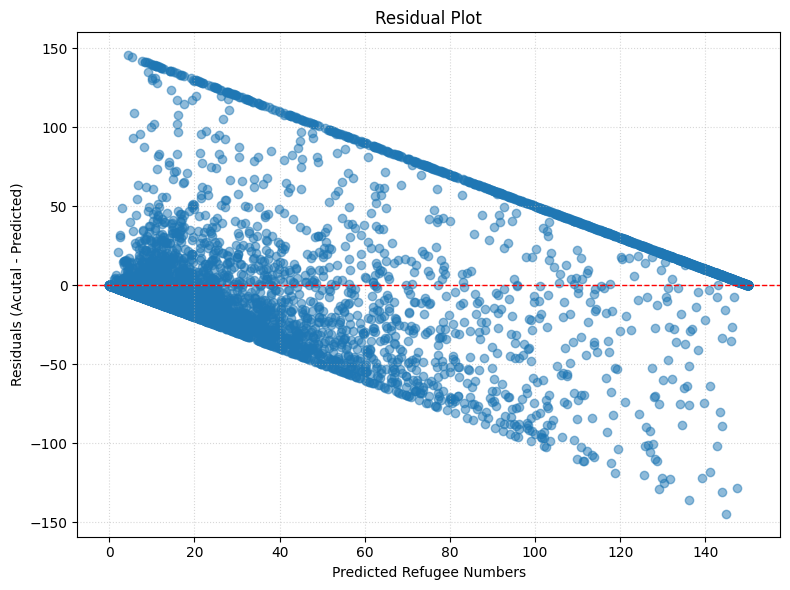

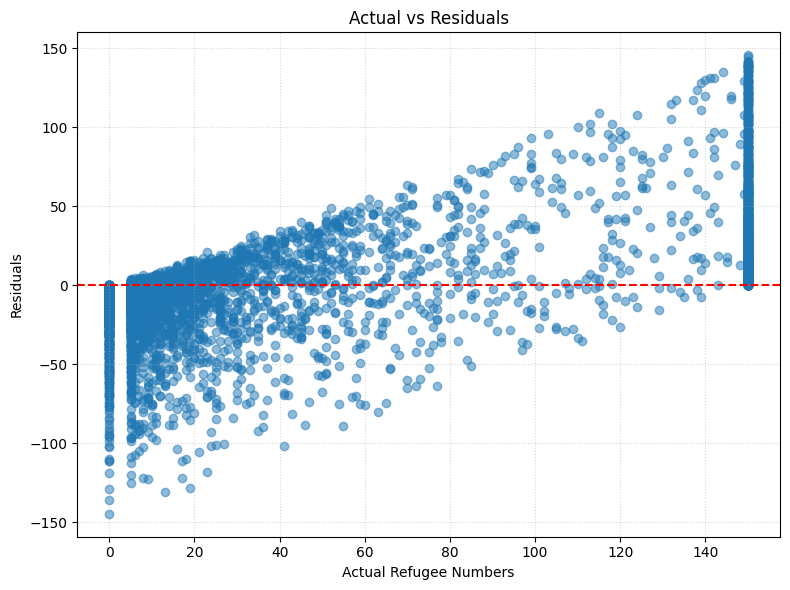

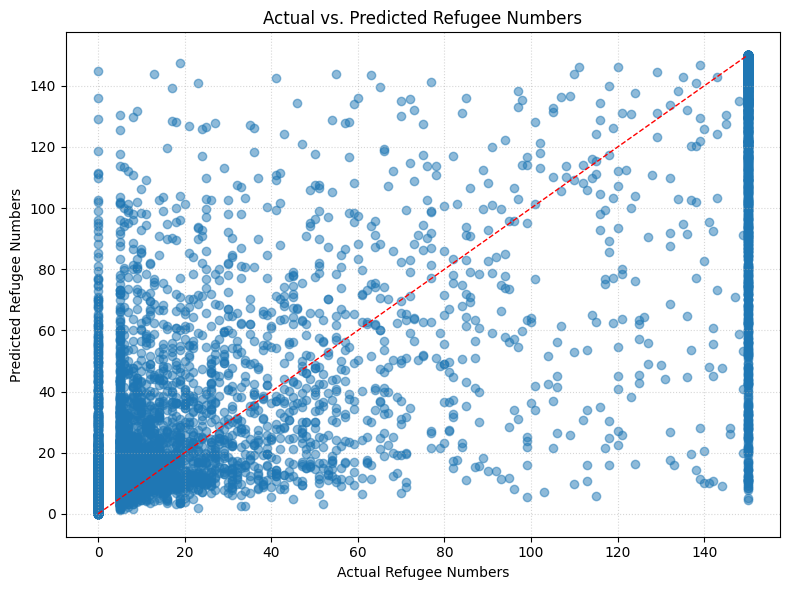

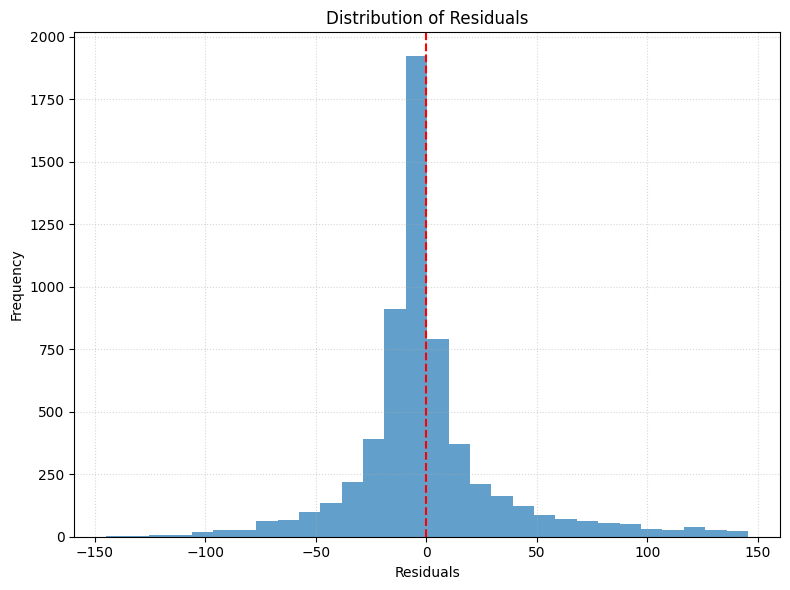

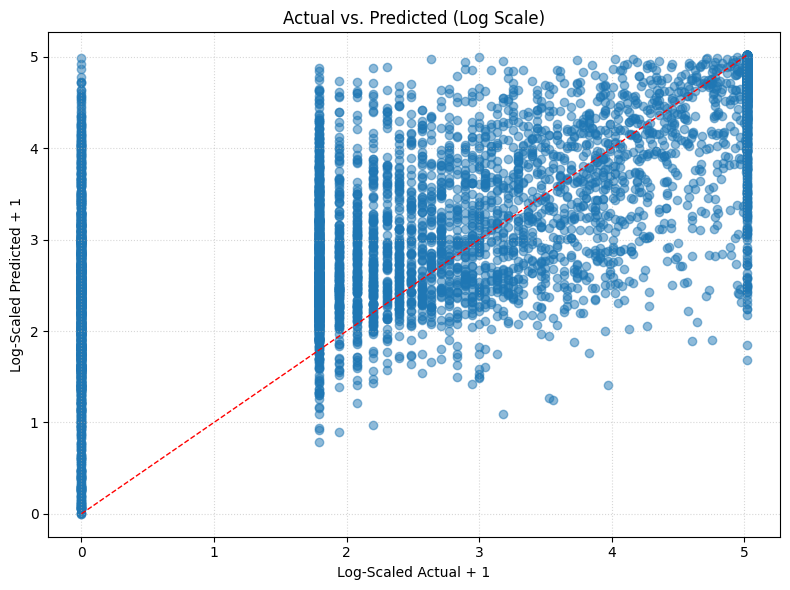

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Residual Plot
residuals = y_test_final - y_pred_final

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_final, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)

plt.xlabel("Predicted Refugee Numbers")
plt.ylabel("Residuals (Acutal - Predicted)")
plt.title("Residual Plot")
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

# Actual vs Residuals Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_final, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Refugee Numbers")
plt.ylabel("Residuals")
plt.title("Actual vs Residuals")
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

# Actual vs Predicted Scatter Plot (with 45 degree line)
plt.figure(figsize=(8,6))
plt.scatter(y_test_final, y_pred_final, alpha=0.5)

min_val = min(np.min(y_test_final), np.min(y_pred_final))
max_val = max(np.max(y_test_final), np.max(y_pred_final))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1)

plt.xlabel("Actual Refugee Numbers")
plt.ylabel("Predicted Refugee Numbers")
plt.title("Actual vs. Predicted Refugee Numbers")
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

# Error Distribution Plot
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

# Log-Scaled Actual vs Predicted Plot
plt.figure(figsize=(8,6))
plt.scatter(np.log1p(y_test_final), np.log1p(y_pred_final), alpha=0.5)
plt.plot([0, np.log1p(y_test_final).max()], [0, np.log1p(y_pred_final).max()], 'r--', linewidth=1)
plt.xlabel("Log-Scaled Actual + 1")
plt.ylabel("Log-Scaled Predicted + 1")
plt.title("Actual vs. Predicted (Log Scale)")
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

## Implementing and Training a Gradient Boosting Regressor to compare models



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
gbr_model.fit(X_train_final, y_train_final)

print("Gradient Boosting Regressor model trained successfully.")

Gradient Boosting Regressor model trained successfully.


## Evaluating Gradient Boosting Regressor


In [ ]:
y_pred_gbr = gbr_model.predict(X_test_final)

mae_gbr = mean_absolute_error(y_test_final, y_pred_gbr)
mse_gbr = mean_squared_error(y_test_final, y_pred_gbr)
r2_gbr = r2_score(y_test_final, y_pred_gbr)

print("\nGradient Boosting Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_gbr:.4f}")
print(f"Mean Squared Error (MSE): {mse_gbr:.4f}")
print(f"R-squared (R2) Score: {r2_gbr:.4f}")


Gradient Boosting Regressor Model Evaluation:
Mean Absolute Error (MAE): 25.6997
Mean Squared Error (MSE): 1452.2889
R-squared (R2) Score: 0.5544


## Compare Model Performances




In [ ]:
model_comparison = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MAE': [mae_final, mae_gbr],
    'MSE': [mse_final, mse_gbr],
    'R2 Score': [r2_final, r2_gbr]
})

print("\nModel Performance Comparison:")
print(model_comparison.set_index('Model'))


Model Performance Comparison:
                                   MAE          MSE  R2 Score
Model                                                        
Random Forest Regressor      21.571076  1174.779745  0.639550
Gradient Boosting Regressor  25.699662  1452.288882  0.554404
